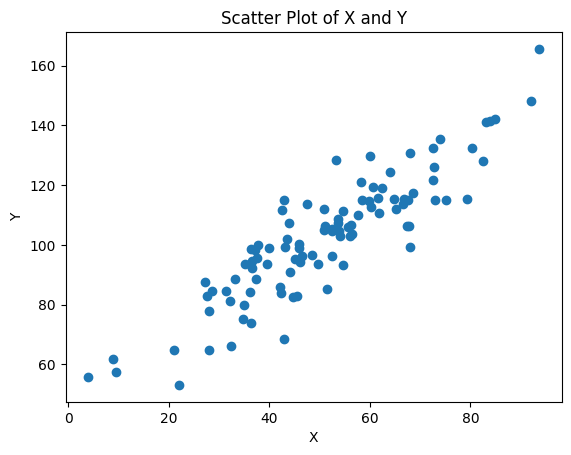

95% Confidence Interval for Coefficient: [0.9410756915163921, 1.1567473415972722]
95% Confidence Interval for Intercept: [43.12744896029942, 55.02198774445573]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Set random seed for reproducibility
np.random.seed(1)

# Generate synthetic data
size = 100
x = 20 * (2.5 + np.random.randn(size))
y = x + (10 * np.random.randn(size) + 50)

# Plot the data
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')

# Perform bootstrap sampling
coefficients = []
intercepts = []
for _ in range(1000):
    idx = np.random.randint(0, size, size)
    x_train = x[idx]
    y_train = y[idx]
    
    model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)  # Reshape x_train for sklearn
    coefficients.append(model.coef_[0])  # Coefficients are in model.coef_
    intercepts.append(model.intercept_)

# Calculate confidence intervals
upper_coefficient = np.percentile(coefficients, 97.5)
lower_coefficient = np.percentile(coefficients, 2.5)
upper_intercept = np.percentile(intercepts, 97.5)
lower_intercept = np.percentile(intercepts, 2.5)

# Display the plot
plt.show()

# Print the confidence intervals
print(f"95% Confidence Interval for Coefficient: [{lower_coefficient}, {upper_coefficient}]")
print(f"95% Confidence Interval for Intercept: [{lower_intercept}, {upper_intercept}]")